# STEP2: Train model - Data 2022

In [1]:
cd ..

/home/ducbui/Documents/code_choi/MP


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve


In [3]:
df = pd.read_csv('final_data.csv')
df = df[df['YEAR'] == 2022]

In [4]:
df.head()

,CODE,NAME,STOCK EXCHANGE,YEAR,TARGET,EBIT,EBITDA,TOTAL EQUITY/TOTAL ASSETS,EPS,CASH/TOTAL CURRENT ASSETS,...,LONG-TERM ASSETS/TOTAL ASSETS,QUICK RATIO,Market Value of Total Equity / Book Values of Total Liabilities,Sales/Total Assets,EBIT/Total Assets,Retain Earnings/Total Assets,Working Capitals/Total Asset,ROIC,AGE,NET INCOME/TOTAL ASSET
1790,AAA,CTCP Nhựa An Phát Xanh,1,2022,1.0,-0.042971,0.001655,-0.069376,-0.101290,2.051556,...,0.442222,-0.176135,-0.267838,-0.054602,-0.083151,-0.085686,-0.071133,-0.470191,20.0,-0.509810
1791,AAM,CTCP Thủy sản MeKong,1,2022,0.0,-0.184485,-0.206270,-0.069247,-0.095942,0.025138,...,-0.029830,1.617335,0.827619,-0.087961,-0.060716,-0.080614,0.164456,-0.011217,20.0,0.344346
1792,AAT,CTCP Tập Đoàn Tiên Sơn Thanh Hóa,1,2022,1.0,-0.138665,-0.159301,-0.069335,-0.098648,-0.157899,...,0.602477,-0.010111,-0.231664,-0.092207,-0.040580,-0.082425,-0.074417,0.235206,27.0,0.441617
1793,AAV,CTCP AAV Group,0,2022,1.0,-0.186211,-0.205305,-0.069317,-0.106364,-0.438093,...,0.177101,0.266596,-0.221836,-0.125889,-0.093258,-0.112231,0.039184,-0.676813,12.0,-0.682020
1794,ABR,CTCP Đầu tư Nhãn hiệu Việt,1,2022,1.0,-0.176128,-0.196765,-0.069311,-0.100417,0.480561,...,0.438644,0.061628,-0.143565,-0.139268,-0.050459,-0.033143,-0.038602,0.200486,10.0,0.366683


## Chia tập Train và Test

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['TARGET', 'CODE', 'NAME', 'YEAR', 'STOCK EXCHANGE'], axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(491, 16) (491,)
(123, 16) (123,)


In [6]:
# Completed training pipeline
completed_pl = Pipeline(
    steps=[
            ("classifier", RandomForestClassifier())
    ]
)

# training
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 1.00
Accuracy on test: 0.98


In [7]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
import numpy as np

# Tính fbeta score
def fbeta(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=np.sqrt(2))

In [8]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Xác định metric cho mô hình
metric = make_scorer(fbeta)
# Đánh giá mô hình
scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Fbeta: 0.955 0.031


In [9]:
completed_pl = Pipeline(
    steps=[
            ("classifier", RandomForestClassifier())
    ]
)

In [10]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# list các mô hình được lựa chọn
models = {
  'LogisticRegression': LogisticRegression(),
  'GaussianNB': GaussianNB(),
  'KNeighborsClassifier': KNeighborsClassifier(),
  # 'SVM': SVC(),
  'MLPClassifier': MLPClassifier(),
  'DecisionTree': DecisionTreeClassifier(),
  'RandomForestClassifier': RandomForestClassifier(),
  'GDBoosting': GradientBoostingClassifier()
}

# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

all_scores = []
# Đánh giá toàn bộ các mô hình trên tập K-Fold đã chia
for key,model in models.items():
  completed_pl = Pipeline(
    steps=[('classifier', model)]
  )
  scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
  models[key] = completed_pl.fit(X_train, y_train)
  y_pred = completed_pl.predict(X_test)
  y_scores = model.predict_proba(X_test)[:, 1] 
  report = classification_report(y_test, y_pred)
  # Tính AUROC
  auroc = roc_auc_score(y_test, y_scores)

  # Tính AUC-PR
  precision, recall, _ = precision_recall_curve(y_test, y_scores)
  auc_pr = auc(recall, precision)
  all_scores.append(scores)
  print(f"==========Model: {model}==========")
  print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))
  print(report)
  print(f"AUROC: {auroc}")
  print(f"AUC-PR: {auc_pr}")

/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

==========Model: LogisticRegression()==========
Mean Fbeta: 0.865 0.039
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87        59
         1.0       0.89      0.88      0.88        64

    accuracy                           0.88       123
   macro avg       0.88      0.88      0.88       123
weighted avg       0.88      0.88      0.88       123

AUROC: 0.9679555084745762
AUC-PR: 0.9740922928457515
==========Model: GaussianNB()==========
Mean Fbeta: 0.867 0.047
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85        59
         1.0       0.83      0.92      0.87        64

    accuracy                           0.86       123
   macro avg       0.87      0.86      0.86       123
weighted avg       0.87      0.86      0.86       123

AUROC: 0.9179025423728814
AUC-PR: 0.867532236080582
==========Model: KNeighborsClassifier()==========
Mean Fbeta: 0.636 0.069
              precision    reca

/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

==========Model: MLPClassifier()==========
Mean Fbeta: 0.864 0.043
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        59
         1.0       0.91      0.91      0.91        64

    accuracy                           0.90       123
   macro avg       0.90      0.90      0.90       123
weighted avg       0.90      0.90      0.90       123

AUROC: 0.9780190677966101
AUC-PR: 0.9808165133622214
==========Model: DecisionTreeClassifier()==========
Mean Fbeta: 0.970 0.026
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        59
         1.0       0.98      0.92      0.95        64

    accuracy                           0.95       123
   macro avg       0.95      0.95      0.95       123
weighted avg       0.95      0.95      0.95       123

AUROC: 0.9524629237288136
AUC-PR: 0.9729293699186992
==========Model: RandomForestClassifier()==========
Mean Fbeta: 0.959 0.025
              precisi

Text(0.5, 1.0, 'Scores Metrics')

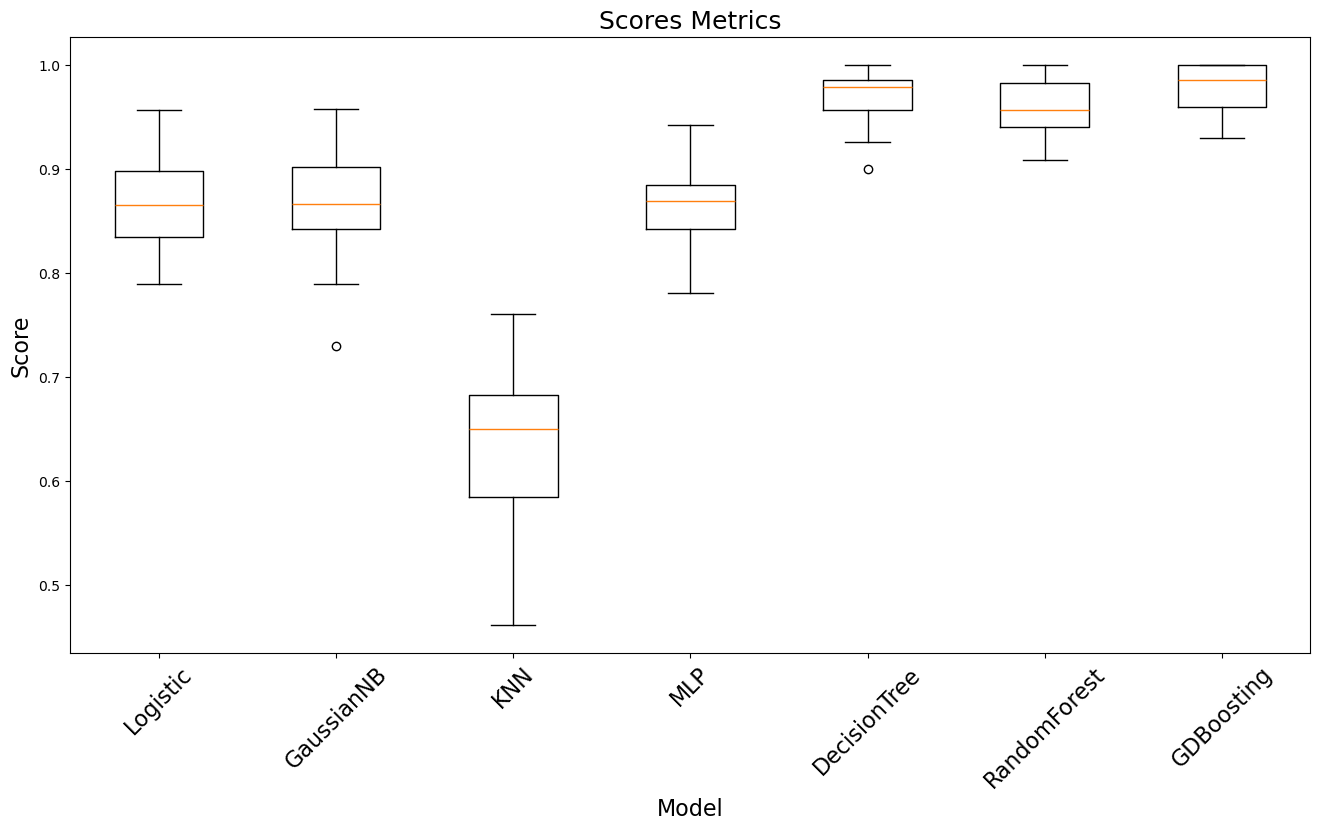

In [11]:
import matplotlib.pyplot as plt
model_names = ['Logistic', 'GaussianNB', 'KNN', 'MLP','DecisionTree', 'RandomForest', 'GDBoosting']

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

Nhìn vào biểu đồ ta có thể thấy GradientBoosting là thuật toán có độ chính xác cao nhất khi score trung bình đạt được khoảng 0.9, độ ổn định cao nên chúng ta sẽ lựa chọn lớp mô hình này để phát triển thành production.

## Grid Search

In [12]:
from sklearn.base import BaseEstimator
class ClassifierSwitcher(BaseEstimator):
  def __init__(
      self, 
      estimator = GradientBoostingClassifier(),
  ):
      """
      A Custom BaseEstimator that can switch between classifiers.
      :param estimator: sklearn object - The classifier
      """ 
      
      self.estimator = estimator


  def fit(self, X, y=None, **kwargs):
      self.estimator.fit(X, y)
      return self


  def predict(self, X, y=None):
      return self.estimator.predict(X)


  def predict_proba(self, X):
      return self.estimator.predict_proba(X)


  def score(self, X, y):
      return self.estimator.score(X, y)

In [13]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(
    steps=[("clf", ClassifierSwitcher())]
)

In [14]:
parameters = [
    {
        'clf__estimator': [GradientBoostingClassifier()],
        # 'clf__estimator__n_estimators': [50, 100],
        # 'clf__estimator__max_depth': [3, 5, 10],
        # 'clf__estimator__criterion': ('gini', 'entropy', "friedman_mse",  "mae"),
        # 'clf__estimator__max_features': ('auto', 'sqrt', 'log2'),
        # 'clf__estimator__min_samples_split': np.linspace(0.1, 0.5, 12),
        # 'clf__estimator__min_samples_leaf': np.linspace(0.1, 0.5, 12),
        # 'clf__estimator__learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
        # 'clf__estimator__subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy', "friedman_mse",  "mae")
    },
]

In [15]:
metric = make_scorer(fbeta)
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END clf__estimator=GradientBoostingClassifier(), clf__estimator__criterion=gini, clf__estimator__max_depth=5, clf__estimator__n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END clf__estimator=GradientBoostingClassifier(), clf__estimator__criterion=gini, clf__estimator__max_depth=5, clf__estimator__n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/5] END clf__estimator=GradientBoostingClassifier(), clf__estimator__criterion=gini, clf__estimator__max_depth=5, clf__estimator__n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/5] END clf__estimator=GradientBoostingClassifier(), clf__estimator__criterion=gini, clf__estimator__max_depth=5, clf__estimator__n_estimators=50;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END clf__estimator=GradientBoostingClassifier(), clf__estimator__criterion=gini, clf__estimator__max_depth=5, clf_

/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ducbui/anaconda3/envs/tenso/lib/python3.10/site-packages/sklearn/pipeline.py", line 475, in fit
 

GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('clf', ClassifierSwitcher())]),
             n_jobs=12,
             param_grid=[{'clf__estimator': [GradientBoostingClassifier()],
                          'clf__estimator__criterion': ('gini', 'entropy',
                                                        'friedman_mse', 'mae'),
                          'clf__estimator__max_depth': [5, 10],
                          'clf__estimator__n_estimators': [50, 100]}],
             return_train_score=True,
             scoring=make_scorer(fbeta, response_method='predict'), verbose=3)

In [16]:
gscv.best_score_

0.960410585152955

In [17]:
best_model = gscv.best_estimator_

In [18]:
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        59
         1.0       1.00      0.95      0.98        64

    accuracy                           0.98       123
   macro avg       0.98      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123



In [19]:

# joblib.dump(best_model, 'best_model_grid_search.pkl')


## XGBoost training

In [20]:
from xgboost import XGBClassifier
# Initialize XGBoost classifier
xgboost_model = XGBClassifier()

# Perform cross-validation
scores = cross_val_score(xgboost_model, X, y, cv=5, scoring=metric)
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
y_scores = xgboost_model.predict_proba(X_test)[:, 1] 
report = classification_report(y_test, y_pred)
# Tính AUROC
auroc = roc_auc_score(y_test, y_scores)

# Tính AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_scores)
auc_pr = auc(recall, precision)
all_scores.append(scores)
print(f"==========Model: XGBoost==========")
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))
print(report)
print(f"AUROC: {auroc}")
print(f"AUC-PR: {auc_pr}")

==========Model: XGBoost==========
Mean Fbeta: 0.972 0.010
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        59
         1.0       0.98      0.97      0.98        64

    accuracy                           0.98       123
   macro avg       0.98      0.98      0.98       123
weighted avg       0.98      0.98      0.98       123

AUROC: 0.9976165254237288
AUC-PR: 0.9979008332317303


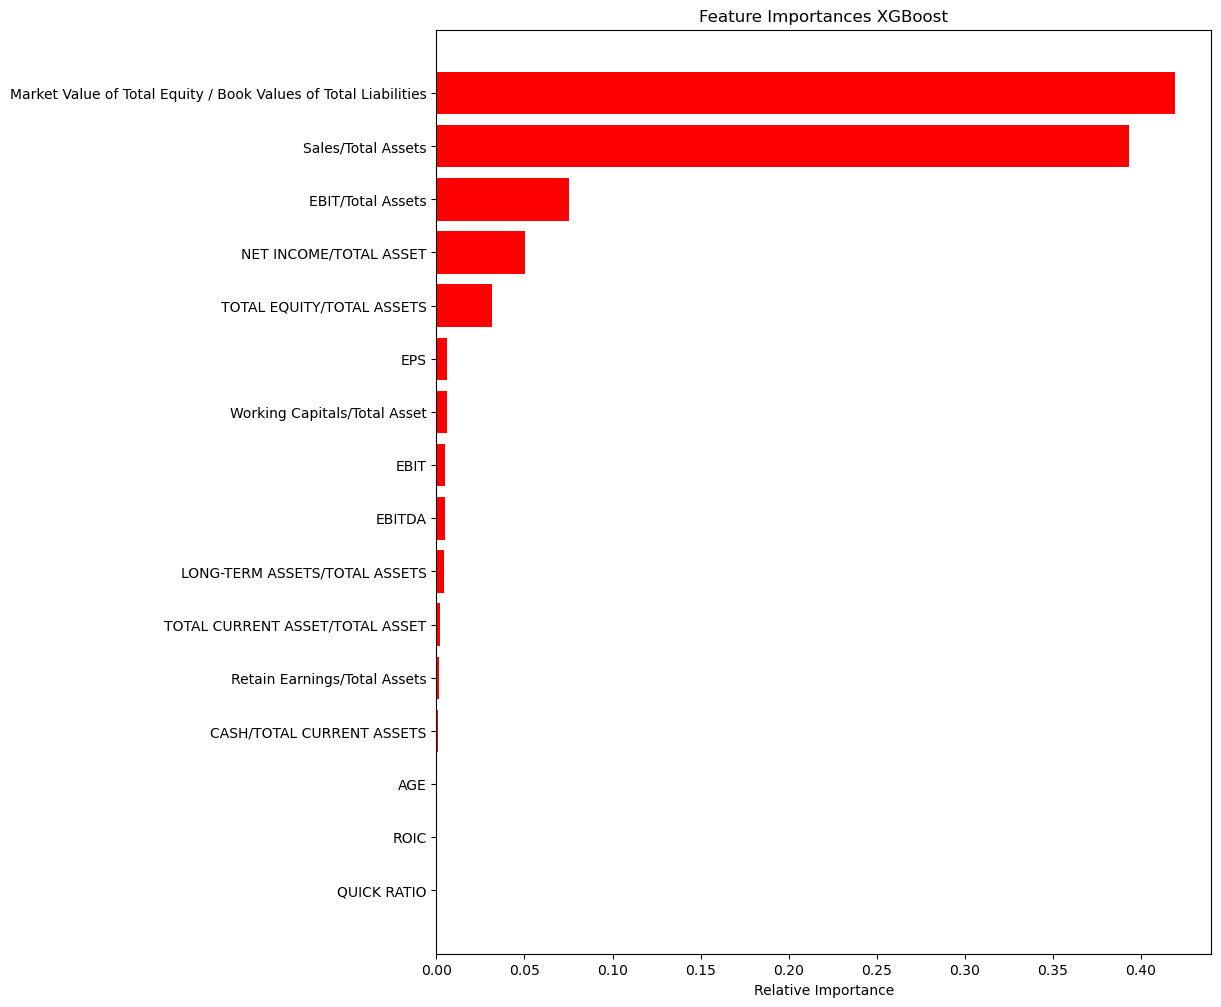

In [21]:
features = X.columns
importances = xgboost_model.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances XGBoost')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## LightGBT Training


In [22]:
import lightgbm as lgb

# Convert data to LightGBM Dataset format
lgb_data = lgb.Dataset(X, label=y)

# Define parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Perform cross-validation to train the model
cv_results = lgb.cv(params, lgb_data, num_boost_round=100, nfold=5, metrics='binary_error', seed=42)
scores = cross_val_score(lgb.LGBMClassifier(), X, y, cv=5, scoring=metric)
all_scores.append(scores)

# Train the final model with the best number of boosting rounds
best_num_boost_round = len(cv_results['valid binary_error-mean'])
lbg_model = lgb.train(params, lgb_data, num_boost_round=best_num_boost_round)

y_pred_prob = lbg_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = (y_pred_prob >= 0.5).astype(int)  # Assuming threshold of 0.5

y_scores = model.predict_proba(X_test)[:, 1] 
report = classification_report(y_test, y_pred)
# Tính AUROC
auroc = roc_auc_score(y_test, y_scores)

# Tính AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_scores)
auc_pr = auc(recall, precision)
# all_scores.append(scores)
print(f"\n==========Model: LightGBT==========")
# print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))
print(report)
print(f"AUROC: {auroc}")
print(f"AUC-PR: {auc_pr}")

# Print cross-validation results
# print("Cross-validation results:", cv_results)
# print("Mean binary error:", np.mean(cv_results['valid binary_error-mean']))
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 236, number of negative: 255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3056
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 16
[LightGBM] [Info] Number of positive: 236, number of negative: 255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3056
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 16
[LightGBM] [Info] Number of positive: 236, number of negative: 255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remo

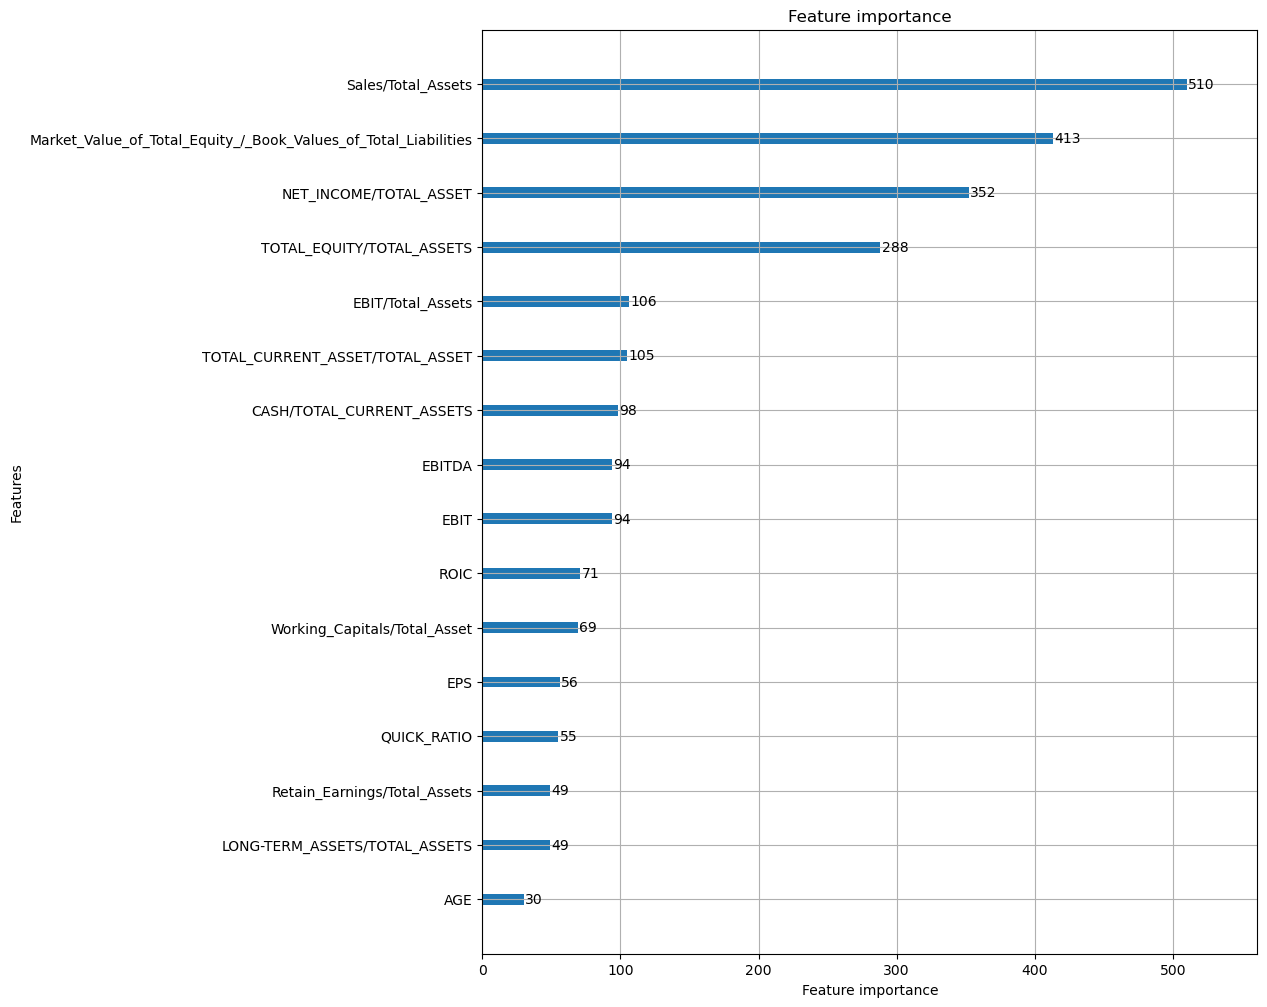

In [23]:
lgb.plot_importance(lbg_model, max_num_features=25, figsize=(10, 12))
plt.show()

## CatBoost Training

In [24]:
from catboost import CatBoostClassifier
# Initialize CatBoostClassifier classifier
catboost_model = CatBoostClassifier()

# Perform cross-validation
scores = cross_val_score(catboost_model, X, y, cv=5, scoring=metric)
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
y_scores = catboost_model.predict_proba(X_test)[:, 1] 
report = classification_report(y_test, y_pred)
# Tính AUROC
auroc = roc_auc_score(y_test, y_scores)

# Tính AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_scores)
auc_pr = auc(recall, precision)
all_scores.append(scores)
print(f"==========Model: CatBoost==========")
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))
print(report)
print(f"AUROC: {auroc}")
print(f"AUC-PR: {auc_pr}")

Learning rate set to 0.007604
0:	learn: 0.6782813	total: 51.9ms	remaining: 51.9s
1:	learn: 0.6676100	total: 53.5ms	remaining: 26.7s
2:	learn: 0.6564128	total: 54.9ms	remaining: 18.2s
3:	learn: 0.6460274	total: 56.6ms	remaining: 14.1s
4:	learn: 0.6355920	total: 61.9ms	remaining: 12.3s
5:	learn: 0.6243787	total: 63.8ms	remaining: 10.6s
6:	learn: 0.6134631	total: 65.9ms	remaining: 9.35s
7:	learn: 0.6011785	total: 69ms	remaining: 8.56s
8:	learn: 0.5930892	total: 72.7ms	remaining: 8.01s
9:	learn: 0.5847327	total: 76.7ms	remaining: 7.6s
10:	learn: 0.5726118	total: 78ms	remaining: 7.01s
11:	learn: 0.5612925	total: 80.7ms	remaining: 6.65s
12:	learn: 0.5540844	total: 82.2ms	remaining: 6.24s
13:	learn: 0.5471228	total: 83.5ms	remaining: 5.88s
14:	learn: 0.5387514	total: 84.7ms	remaining: 5.56s
15:	learn: 0.5292272	total: 86ms	remaining: 5.29s
16:	learn: 0.5213323	total: 87.5ms	remaining: 5.06s
17:	learn: 0.5117307	total: 89.3ms	remaining: 4.87s
18:	learn: 0.5015477	total: 90.5ms	remaining: 4.67s

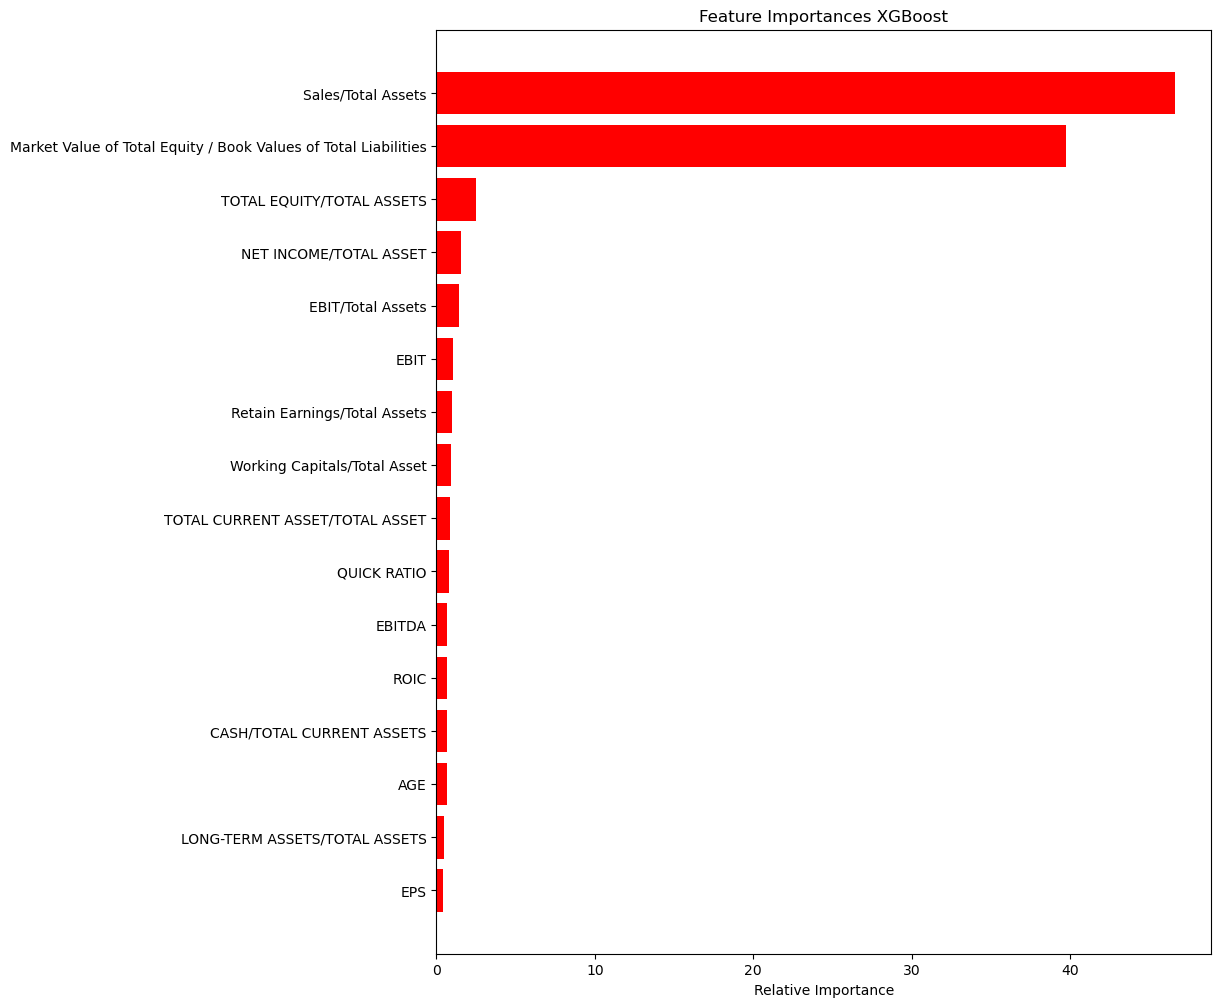

In [25]:
features = X.columns
importances = catboost_model.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances XGBoost')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 1.0, 'Scores Metrics')

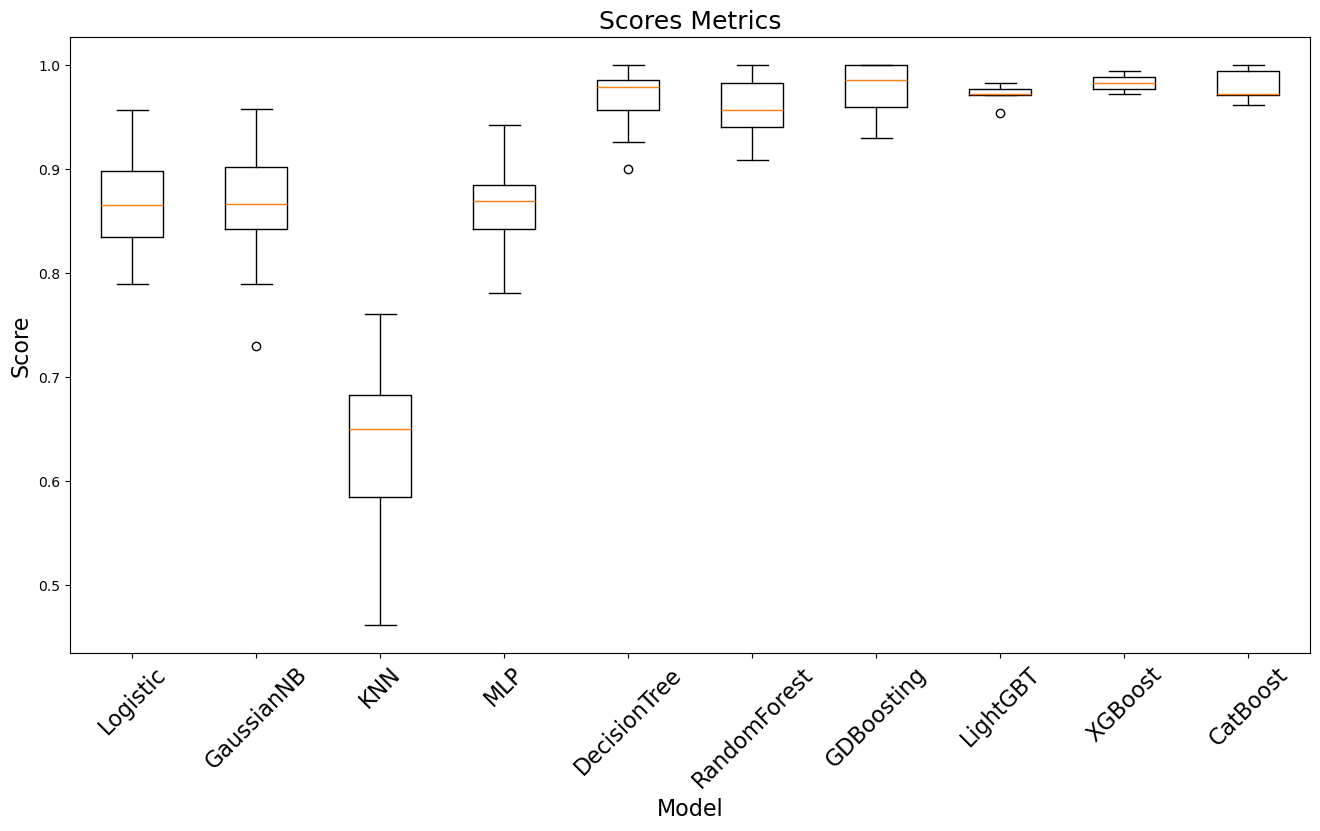

In [26]:
import matplotlib.pyplot as plt
model_names = ['Logistic', 'GaussianNB', 'KNN', 'MLP','DecisionTree', 'RandomForest', 'GDBoosting', 'LightGBT', 'XGBoost', 'CatBoost']

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

In [27]:
# joblib.dump(catboost_model, 'best_model.pkl')